<a href="https://colab.research.google.com/github/Pkson13/Deep-learning/blob/main/makemore/makemore_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt # for making figures
%matplotlib inline

if os.path.exists("names.txt"):
    print("File exists")
else:
    print("names.txt does not exist")
    !wget https://raw.githubusercontent.com/karpathy/makemore/refs/heads/master/names.txt


words = open("names.txt", "r").read().split("\n")
words[:10]

names.txt does not exist
--2025-09-16 17:29:23--  https://raw.githubusercontent.com/karpathy/makemore/refs/heads/master/names.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 228145 (223K) [text/plain]
Saving to: ‘names.txt’

names.txt           100%[===================>] 222.80K  --.-KB/s    in 0.03s   

2025-09-16 17:29:23 (8.38 MB/s) - ‘names.txt’ saved [228145/228145]



['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [2]:
# read in all the words
words = open('names.txt', 'r').read().splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [3]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [4]:
# build the dataset

block_size = 3 # context length: how many characters do we take to predict the next one?
X, Y = [], []
for w in words[:5]:

  #print(w)
  context = [0] * block_size
  print("context", context)
  for ch in w + '.':
    ix = stoi[ch]
    X.append(context)
    Y.append(ix)
    print(''.join(itos[i] for i in context), '--->', itos[ix])
    context = context[1:] + [ix] # crop and append
# print("x:",X,"y:",Y)

X = torch.tensor(X)
Y = torch.tensor(Y)
X, X.shape, Y, Y.shape

context [0, 0, 0]
... ---> e
..e ---> m
.em ---> m
emm ---> a
mma ---> .
context [0, 0, 0]
... ---> o
..o ---> l
.ol ---> i
oli ---> v
liv ---> i
ivi ---> a
via ---> .
context [0, 0, 0]
... ---> a
..a ---> v
.av ---> a
ava ---> .
context [0, 0, 0]
... ---> i
..i ---> s
.is ---> a
isa ---> b
sab ---> e
abe ---> l
bel ---> l
ell ---> a
lla ---> .
context [0, 0, 0]
... ---> s
..s ---> o
.so ---> p
sop ---> h
oph ---> i
phi ---> a
hia ---> .


(tensor([[ 0,  0,  0],
         [ 0,  0,  5],
         [ 0,  5, 13],
         [ 5, 13, 13],
         [13, 13,  1],
         [ 0,  0,  0],
         [ 0,  0, 15],
         [ 0, 15, 12],
         [15, 12,  9],
         [12,  9, 22],
         [ 9, 22,  9],
         [22,  9,  1],
         [ 0,  0,  0],
         [ 0,  0,  1],
         [ 0,  1, 22],
         [ 1, 22,  1],
         [ 0,  0,  0],
         [ 0,  0,  9],
         [ 0,  9, 19],
         [ 9, 19,  1],
         [19,  1,  2],
         [ 1,  2,  5],
         [ 2,  5, 12],
         [ 5, 12, 12],
         [12, 12,  1],
         [ 0,  0,  0],
         [ 0,  0, 19],
         [ 0, 19, 15],
         [19, 15, 16],
         [15, 16,  8],
         [16,  8,  9],
         [ 8,  9,  1]]),
 torch.Size([32, 3]),
 tensor([ 5, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1,  0,  1, 22,  1,  0,  9, 19,
          1,  2,  5, 12, 12,  1,  0, 19, 15, 16,  8,  9,  1,  0]),
 torch.Size([32]))

In [5]:
X[:10], Y[:10]

(tensor([[ 0,  0,  0],
         [ 0,  0,  5],
         [ 0,  5, 13],
         [ 5, 13, 13],
         [13, 13,  1],
         [ 0,  0,  0],
         [ 0,  0, 15],
         [ 0, 15, 12],
         [15, 12,  9],
         [12,  9, 22]]),
 tensor([ 5, 13, 13,  1,  0, 15, 12,  9, 22,  9]))

In [6]:
# build the dataset
block_size = 3 # context length: how many characters do we take to predict the next one?

def build_dataset(words):
  X, Y = [], []
  for w in words:

    #print(w)
    context = [0] * block_size
    for ch in w + '.':
      ix = stoi[ch]
      X.append(context)
      Y.append(ix)
      #print(''.join(itos[i] for i in context), '--->', itos[ix])
      context = context[1:] + [ix] # crop and append

  X = torch.tensor(X)
  Y = torch.tensor(Y)
  print(X.shape, Y.shape)
  return X, Y

import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))
print(len(words))
print("n1", n1, "n2", n2)

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])

32033
n1 25626 n2 28829
torch.Size([182625, 3]) torch.Size([182625])
torch.Size([22655, 3]) torch.Size([22655])
torch.Size([22866, 3]) torch.Size([22866])


In [7]:
c = torch.randn(27,2)
c

tensor([[-0.2417,  0.4976],
        [-0.8069, -0.1038],
        [ 1.8190, -0.1708],
        [ 1.9670, -0.7930],
        [-1.0012, -0.0951],
        [ 0.0658, -1.1751],
        [-1.4918, -1.3763],
        [-2.3682, -1.6268],
        [-1.1282,  0.6903],
        [-1.2761, -0.9259],
        [ 0.1697, -0.4807],
        [ 0.4626, -0.9933],
        [ 0.3945, -0.3887],
        [ 1.4796, -0.5790],
        [ 0.7348, -0.1758],
        [-0.9754, -0.5599],
        [-0.9667, -1.0878],
        [-1.1353, -0.1629],
        [ 1.1983, -0.7970],
        [-1.2050, -1.1737],
        [ 0.6453,  0.1123],
        [-1.1863, -0.6553],
        [ 1.4974,  0.0865],
        [ 2.1858, -1.0126],
        [-0.8343,  1.4278],
        [ 0.2598, -1.0157],
        [-0.7158, -0.0920]])

In [8]:
X[13, 2]
c[X][13,2]

tensor([-0.8069, -0.1038])

In [9]:
c[1]

tensor([-0.8069, -0.1038])

In [10]:
# torch.randn([1,3]).shape

emb = c[X]
emb

tensor([[[-0.2417,  0.4976],
         [-0.2417,  0.4976],
         [-0.2417,  0.4976]],

        [[-0.2417,  0.4976],
         [-0.2417,  0.4976],
         [ 0.0658, -1.1751]],

        [[-0.2417,  0.4976],
         [ 0.0658, -1.1751],
         [ 1.4796, -0.5790]],

        [[ 0.0658, -1.1751],
         [ 1.4796, -0.5790],
         [ 1.4796, -0.5790]],

        [[ 1.4796, -0.5790],
         [ 1.4796, -0.5790],
         [-0.8069, -0.1038]],

        [[-0.2417,  0.4976],
         [-0.2417,  0.4976],
         [-0.2417,  0.4976]],

        [[-0.2417,  0.4976],
         [-0.2417,  0.4976],
         [-0.9754, -0.5599]],

        [[-0.2417,  0.4976],
         [-0.9754, -0.5599],
         [ 0.3945, -0.3887]],

        [[-0.9754, -0.5599],
         [ 0.3945, -0.3887],
         [-1.2761, -0.9259]],

        [[ 0.3945, -0.3887],
         [-1.2761, -0.9259],
         [ 1.4974,  0.0865]],

        [[-1.2761, -0.9259],
         [ 1.4974,  0.0865],
         [-1.2761, -0.9259]],

        [[ 1.4974,  0

In [11]:
emb[:,0,:]

tensor([[-0.2417,  0.4976],
        [-0.2417,  0.4976],
        [-0.2417,  0.4976],
        [ 0.0658, -1.1751],
        [ 1.4796, -0.5790],
        [-0.2417,  0.4976],
        [-0.2417,  0.4976],
        [-0.2417,  0.4976],
        [-0.9754, -0.5599],
        [ 0.3945, -0.3887],
        [-1.2761, -0.9259],
        [ 1.4974,  0.0865],
        [-0.2417,  0.4976],
        [-0.2417,  0.4976],
        [-0.2417,  0.4976],
        [-0.8069, -0.1038],
        [-0.2417,  0.4976],
        [-0.2417,  0.4976],
        [-0.2417,  0.4976],
        [-1.2761, -0.9259],
        [-1.2050, -1.1737],
        [-0.8069, -0.1038],
        [ 1.8190, -0.1708],
        [ 0.0658, -1.1751],
        [ 0.3945, -0.3887],
        [-0.2417,  0.4976],
        [-0.2417,  0.4976],
        [-0.2417,  0.4976],
        [-1.2050, -1.1737],
        [-0.9754, -0.5599],
        [-0.9667, -1.0878],
        [-1.1282,  0.6903]])

In [12]:
torch.unbind(emb,1) #same as the previous cell

(tensor([[-0.2417,  0.4976],
         [-0.2417,  0.4976],
         [-0.2417,  0.4976],
         [ 0.0658, -1.1751],
         [ 1.4796, -0.5790],
         [-0.2417,  0.4976],
         [-0.2417,  0.4976],
         [-0.2417,  0.4976],
         [-0.9754, -0.5599],
         [ 0.3945, -0.3887],
         [-1.2761, -0.9259],
         [ 1.4974,  0.0865],
         [-0.2417,  0.4976],
         [-0.2417,  0.4976],
         [-0.2417,  0.4976],
         [-0.8069, -0.1038],
         [-0.2417,  0.4976],
         [-0.2417,  0.4976],
         [-0.2417,  0.4976],
         [-1.2761, -0.9259],
         [-1.2050, -1.1737],
         [-0.8069, -0.1038],
         [ 1.8190, -0.1708],
         [ 0.0658, -1.1751],
         [ 0.3945, -0.3887],
         [-0.2417,  0.4976],
         [-0.2417,  0.4976],
         [-0.2417,  0.4976],
         [-1.2050, -1.1737],
         [-0.9754, -0.5599],
         [-0.9667, -1.0878],
         [-1.1282,  0.6903]]),
 tensor([[-0.2417,  0.4976],
         [-0.2417,  0.4976],
         [ 0

In [13]:
torch.unbind(torch.tensor([[1, 2, 3],
                           [4, 5, 6],
                           [7, 8, 9]]), 1)  #getting rid of rows

(tensor([1, 4, 7]), tensor([2, 5, 8]), tensor([3, 6, 9]))

In [14]:
# torch.cat(torch.unbind(emb, 1), 1) # or a more efficient way would be by using the view() method which is very fast
x1 = emb.view(-1,6)

In [15]:
W1 = torch.randn((6, 100))
b1 = torch.randn(100)
h = torch.tanh(x1 @W1 + b1)
h.shape

torch.Size([32, 100])

In [16]:
w2 = torch.randn((100, 27))
b2 = torch.randn(27)
logits = h@ w2 + b2
logits.shape

torch.Size([32, 27])

In [17]:
#softmax
counts = logits.exp()
probs = counts/ counts.sum(1, keepdim=True)
probs.shape

torch.Size([32, 27])

In [18]:
probs

tensor([[4.2067e-08, 4.0716e-04, 5.1772e-07, 1.0075e-09, 8.4723e-02, 4.2457e-04,
         3.6021e-04, 3.0887e-06, 1.6872e-09, 2.0661e-03, 5.4349e-03, 1.2147e-11,
         1.2122e-04, 1.3782e-12, 6.2259e-05, 6.1140e-07, 1.2284e-06, 4.6432e-02,
         7.9477e-02, 1.0810e-03, 7.7878e-01, 3.6404e-07, 3.9798e-09, 4.4477e-04,
         1.2290e-05, 1.4070e-04, 2.3193e-05],
        [5.5610e-03, 6.6120e-07, 3.0300e-05, 3.5105e-07, 9.2783e-06, 4.0411e-08,
         1.2772e-07, 5.6156e-03, 1.8492e-10, 4.4758e-07, 5.8894e-02, 2.3523e-13,
         7.2041e-07, 3.3045e-08, 8.2103e-01, 1.2192e-12, 1.1900e-10, 1.0615e-01,
         1.9766e-11, 2.3485e-06, 4.7258e-07, 1.4213e-05, 2.6284e-03, 4.3166e-05,
         4.2890e-07, 8.6947e-07, 1.0184e-05],
        [9.2132e-07, 1.5373e-14, 6.9800e-09, 8.9238e-09, 1.8896e-09, 4.2635e-09,
         7.7505e-11, 7.4168e-08, 3.8797e-13, 4.7935e-10, 2.0697e-04, 1.3230e-08,
         1.2413e-06, 4.0647e-05, 5.7555e-04, 2.8649e-07, 1.2919e-09, 1.3917e-07,
         1.1401e-

In [19]:
Y

tensor([ 5, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1,  0,  1, 22,  1,  0,  9, 19,
         1,  2,  5, 12, 12,  1,  0, 19, 15, 16,  8,  9,  1,  0])

In [20]:
probs[torch.arange(32), Y]

tensor([4.2457e-04, 3.3045e-08, 4.0647e-05, 3.5268e-11, 1.8547e-04, 6.1140e-07,
        1.5007e-06, 4.4592e-04, 1.3258e-06, 9.8410e-06, 2.5703e-09, 3.3591e-02,
        4.0716e-04, 2.9567e-07, 3.9747e-10, 6.5879e-05, 2.0661e-03, 2.5391e-07,
        5.1890e-08, 3.7055e-04, 6.8434e-11, 2.1537e-12, 3.4624e-07, 1.4723e-11,
        9.8682e-03, 1.0810e-03, 3.7578e-15, 7.4494e-13, 1.7056e-14, 6.6199e-02,
        2.4856e-10, 4.5864e-05])

# ------------ now made respectable :) ---------------


In [21]:
Xtr.shape, Ytr.shape # dataset


(torch.Size([182625, 3]), torch.Size([182625]))

In [22]:
g = torch.Generator().manual_seed(2147483647) # for reproducibility
C = torch.randn((27, 20), generator=g)
W1 = torch.randn((60, 200), generator=g)
b1 = torch.randn(200, generator=g)
W2 = torch.randn((200, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [23]:
sum(p.nelement() for p in parameters) # number of parameters in total


18167

In [24]:
for p in parameters:
  p.requires_grad = True

In [25]:
lre = torch.linspace(-3, 0, 1000)
lrs = 10**lre

In [26]:
lri = []
lossi = []
stepi = []

In [27]:
Xtr.shape[0]

182625

In [37]:
torch.cuda.is_available()

False

In [28]:
for i in range(200000):

  # minibatch construct
  ix = torch.randint(0, Xtr.shape[0], (32,))

  # forward pass
  emb = C[Xtr[ix]] # (32, 3, 20)
  h = torch.tanh(emb.view(-1, 60) @ W1 + b1) # (32, 200)
  logits = h @ W2 + b2 # (32, 27)
  loss = F.cross_entropy(logits, Ytr[ix])
  #print(loss.item())

  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()

  # update
  #lr = lrs[i]
  lr = 0.1 if i < 100000 else 0.01
  for p in parameters:
    p.data += -lr * p.grad

  # track stats
  #lri.append(lre[i])
  stepi.append(i)
  lossi.append(loss.log10().item())

#print(loss.item())

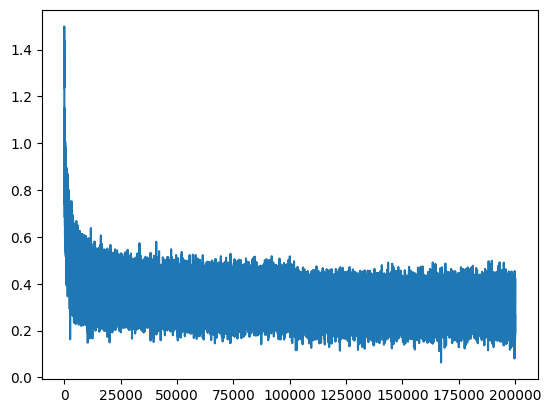

In [29]:
plt.plot(stepi, lossi)


In [30]:
emb = C[Xtr] # (32, 3, 20)
h = torch.tanh(emb.view(-1, 60) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ytr)
loss

tensor(2.0722, grad_fn=<NllLossBackward0>)

In [31]:
loss.log10().item()

0.31642332673072815

In [33]:
# dev loss
emb = C[Xdev] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 60) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ydev)
loss

tensor(2.1491, grad_fn=<NllLossBackward0>)

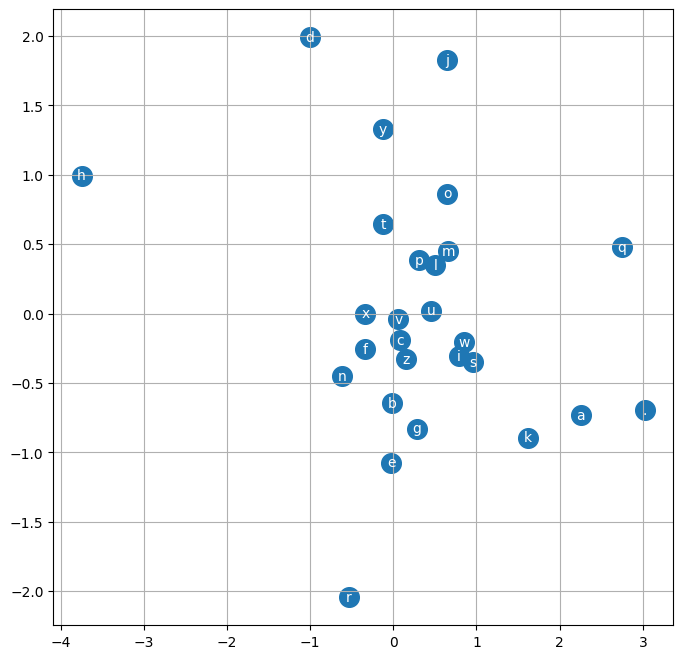

In [35]:
# visualize dimensions 0 and 1 of the embedding matrix C for all characters
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data, C[:,1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha="center", va="center", color='white')
plt.grid('minor')

In [34]:
context = [0] * block_size
C[torch.tensor([context])].shape

torch.Size([1, 3, 20])

In [42]:
# sample from the model
# g = torch.Generator().manual_seed(2147483647 + 10)

for _ in range(20):

    out = []
    context = [0] * block_size # initialize with all ...
    while True:
      emb = C[torch.tensor([context])] # (1,block_size,d)
      h = torch.tanh(emb.view(1, -1) @ W1 + b1)
      logits = h @ W2 + b2
      probs = F.softmax(logits, dim=1)
      ix = torch.multinomial(probs, num_samples=1).item()
      context = context[1:] + [ix]
      out.append(ix)
      if ix == 0:
        break

    print(''.join(itos[i] for i in out))

rosdia.
empri.
nohandraya.
chruv.
ben.
mary.
keagan.
kenni.
zavir.
shiva.
meilius.
zakilsaius.
elikeyris.
mica.
waidesahi.
suleigh.
alah.
heairi.
alija.
zeram.
